<a href="https://colab.research.google.com/github/samuelallam-dot/DataScienceandAI/blob/main/Sam_A_Week_7_Seminar_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Salary and Company Size EDA completed in Exam conditions

Need to be much faster!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

from google.colab import files
upload = files.upload()

Saving EDA-DP.txt to EDA-DP.txt


In [2]:
df = pd.read_csv("EDA-DP.txt")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16534 non-null  int64 
 1   experience_level    16534 non-null  object
 2   employment_type     16534 non-null  object
 3   job_title           16534 non-null  object
 4   salary              16534 non-null  int64 
 5   salary_currency     16534 non-null  object
 6   salary_in_usd       16534 non-null  int64 
 7   employee_residence  16534 non-null  object
 8   remote_ratio        16534 non-null  int64 
 9   company_location    16534 non-null  object
 10  company_size        16534 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


No missing values


In [5]:
df = df.drop(columns=['salary', 'salary_currency'], errors='ignore')
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,US,0,US,M


Removing unnecessary collumns

I will focus the analysis on the relationship between company size and salary

In [6]:
df['salary_in_usd'].describe()

,salary_in_usd
count,16534.000000
mean,149686.777973
std,68505.293156
min,15000.000000
25%,101125.000000
50%,141300.000000
75%,185900.000000
max,800000.000000


# Salary Distribution

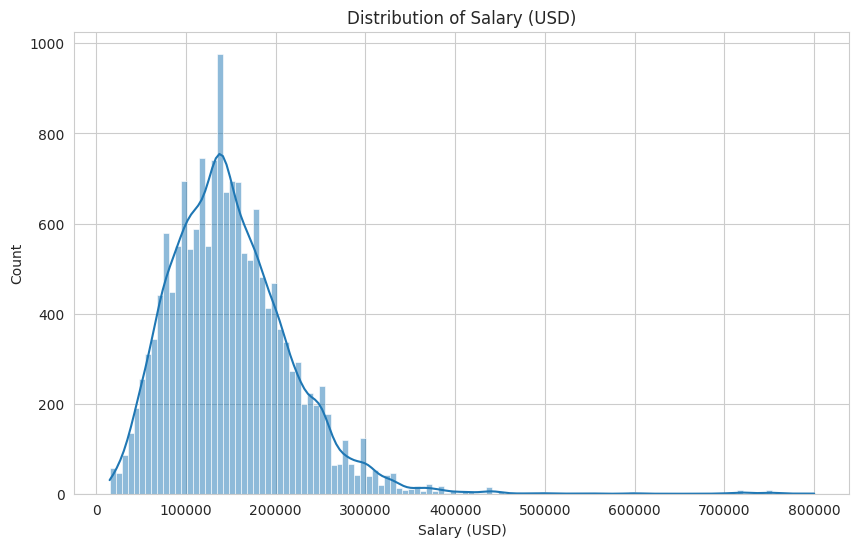

In [7]:
sns.histplot(df['salary_in_usd'], kde=True)
plt.title("Distribution of Salary (USD)")
plt.xlabel("Salary (USD)")
plt.show()


Making structure clearer

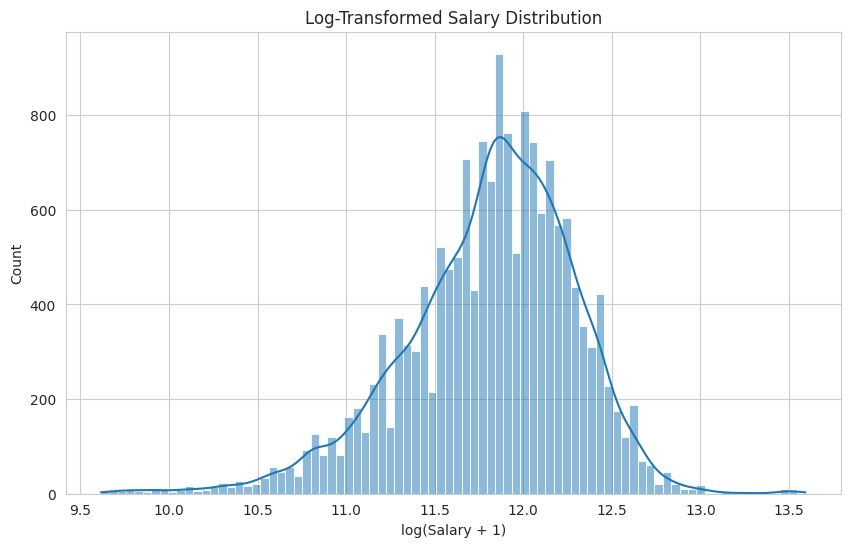

In [8]:
sns.histplot(np.log1p(df['salary_in_usd']), kde=True)
plt.title("Log-Transformed Salary Distribution")
plt.xlabel("log(Salary + 1)")
plt.show()

The log-transformed salary distribution is far closer to symmetric, suggesting that a log-scale salary may be more suitable for statistical modelling.

In [9]:
df['company_size'].value_counts()

,count
company_size,
M,15306
L,1040
S,188


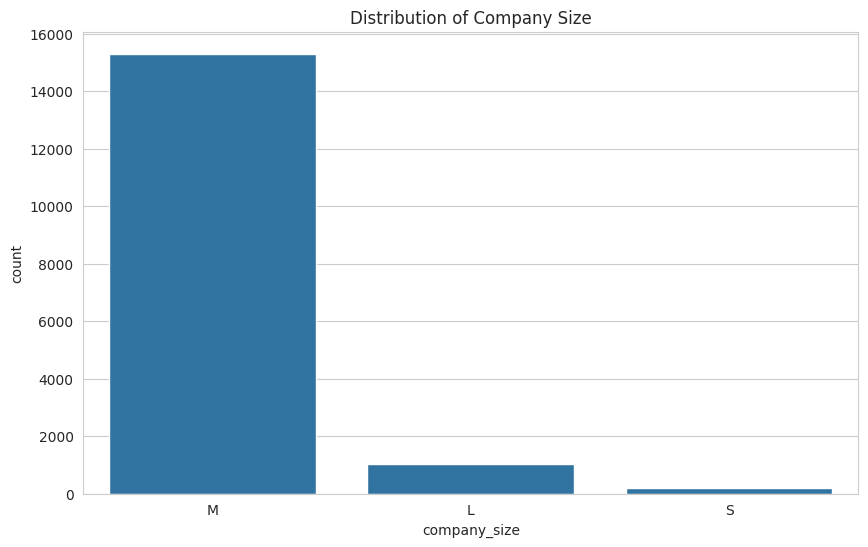

In [10]:
sns.countplot(x='company_size', data=df)
plt.title("Distribution of Company Size")
plt.show()

Categorical and imbalanced which is crucial to note if I was to conduct future modelling

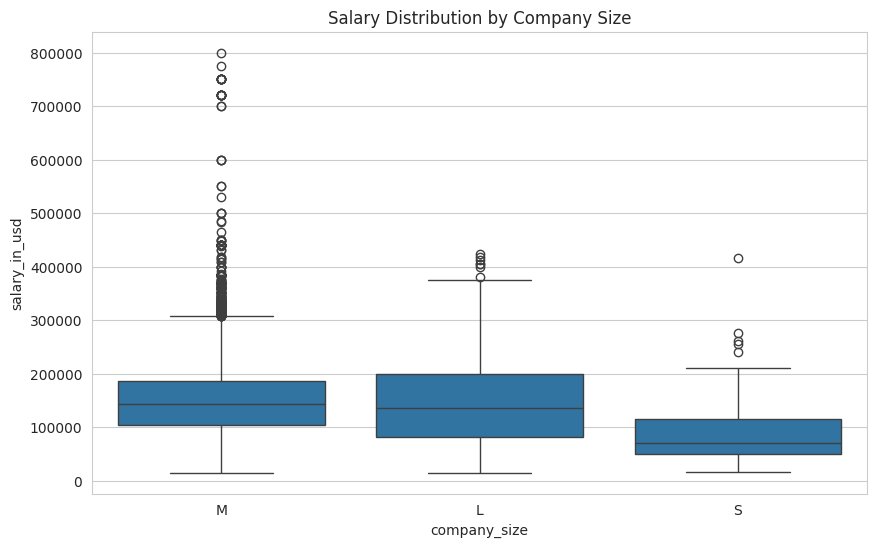

In [11]:
sns.boxplot(x='company_size', y='salary_in_usd', data=df)
plt.title("Salary Distribution by Company Size")
plt.show()

In [12]:
df.groupby('company_size')['salary_in_usd'].agg(['mean', 'median', 'std', 'count'])


,mean,median,std,count
company_size,,,,
L,140889.563462,136000.0,73762.237801,1040
M,151059.071214,143000.0,67848.933189,15306
S,86627.111702,71089.5,57709.106926,188


Salary skewnness and Kurtosis

In [13]:
print("Salary Skewness:", round(df['salary_in_usd'].skew(), 2))
print("Salary Kurtosis:", round(df['salary_in_usd'].kurt(), 2))


Salary Skewness: 1.49
Salary Kurtosis: 7.62


Conclusion: Company Size and Salary (USD)

The statistical summary, distributional measures, and visual analysis together indicate that company size is a meaningful predictor of salary, but the relationship is shaped by strong skewness, heavy tails, and substantial class imbalance.

Across company sizes, medium-sized firms (M) report the highest mean and median salaries (mean ≈ $151k, median ≈ $143k), followed by large firms (L) (mean ≈ $141k, median ≈ $136k). Small companies (S) consistently offer lower compensation, with a median salary of approximately $71k. This pattern suggests a clear salary premium associated with operating at larger organisational scales.

However, salary distributions are far from normal. The overall salary skewness of 1.49 indicates a pronounced right skew, while a kurtosis of 7.62 points to heavy tails and extreme values well beyond what would be expected under a normal distribution. These statistics align closely with the box plot, which shows a large number of high-end outliers—particularly among medium-sized companies.

The concentration of outliers within the medium-sized category is partly a genuine reflection of heterogeneity in compensation structures, but it is also amplified by severe class imbalance. Medium-sized firms account for the vast majority of observations, making extreme salaries statistically more likely to appear in this group. In contrast, small companies are heavily underrepresented, limiting the observed spread and potentially masking true variability.

Taken together, these results suggest that mean salary is not a robust summary measure for comparing company sizes. The combination of right skew, high kurtosis, and outliers means that median salary provides a more reliable indicator of typical compensation, particularly when used as an input or target in predictive models.

In conclusion, company size has a clear and interpretable relationship with salary, but this relationship is non-linear and distributionally complex. Any modelling approach aimed at predicting salary should therefore account for skewness (e.g. via log transformation), handle class imbalance explicitly, and prioritise robust statistics. Ignoring these properties would risk overestimating the influence of high-paying outliers and misrepresenting typical salary outcomes across company sizes.